In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler


plt.style.use('ggplot')
#np.set_printoptions(suppress=True)

In [2]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [1]:
#pandas_profiling.ProfileReport(kickstarter)

In [4]:
# First, we're going to use KNN to try and predict Kickstarter success:

In [5]:
kickstarter.columns

Index(['id', 'slug', 'state_successful', 'goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'location', 'child_category'],
      dtype='object')

In [6]:
kickstarter_numeric = kickstarter.drop(columns = ['id', 'slug', 'child_category','location'])

In [7]:
kickstarter_numeric.columns

Index(['state_successful', 'goal', 'staff_pick_True', 'cam_length',
       'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater'],
      dtype='object')

In [3]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [4]:
X_mid, X_test_sc, y_mid, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [5]:
X_train_sc, X_val_sc, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train_sc)
X_train = scaler.transform(X_train_sc)
X_val = scaler.transform(X_val_sc)
X_test = scaler.transform(X_test_sc)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
pred = knn.predict(X_val)

In [14]:
print(confusion_matrix(y_val,pred))

[[11482  7504]
 [ 6302 16122]]


In [15]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62     18986
           1       0.68      0.72      0.70     22424

   micro avg       0.67      0.67      0.67     41410
   macro avg       0.66      0.66      0.66     41410
weighted avg       0.67      0.67      0.67     41410



In [20]:
#error_rate = []

# Will take some time
#for i in range(1,40):
    
    #knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(X_train,y_train)
    #pred_i = knn.predict(X_test)
    #error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

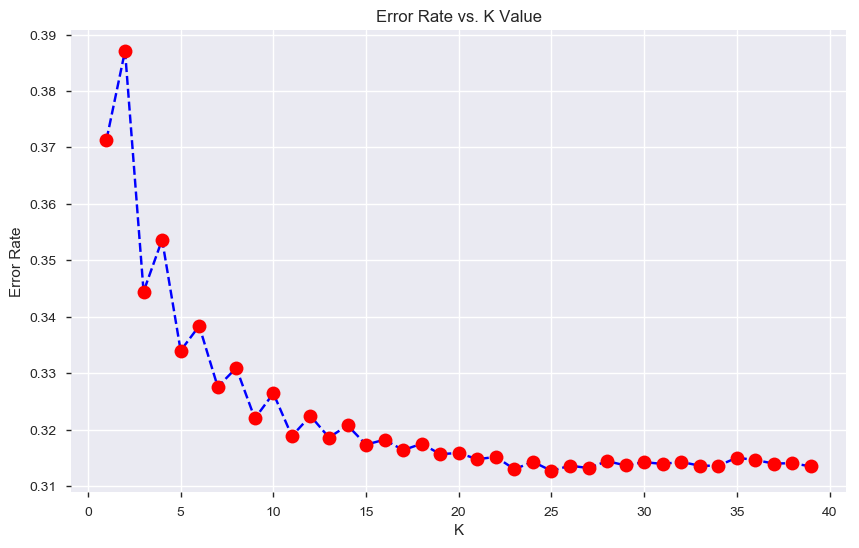

In [21]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         #markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')

In [16]:
knn_25 = KNeighborsClassifier(n_neighbors = 25)
knn_25.fit(X_train, y_train)
predictions = knn_25.predict(X_val)
print(confusion_matrix(y_val,predictions))
print(classification_report(y_val, predictions))

[[11501  7485]
 [ 5395 17029]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64     18986
           1       0.69      0.76      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.68      0.68     41410
weighted avg       0.69      0.69      0.69     41410

